# Breast Cancer Prediction Using Decision Tree Ensembles

**Code authored by**: Shawhin Talebi <br>
**Article link**: https://towardsdatascience.com/10-decision-trees-are-better-than-1-719406680564?sk=196b2f9122d90f78eda31bfb3448ef5d <br>

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer # toy dataset (sorry)

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

### Data prep

In [2]:
df = load_breast_cancer(as_frame = True)['frame']

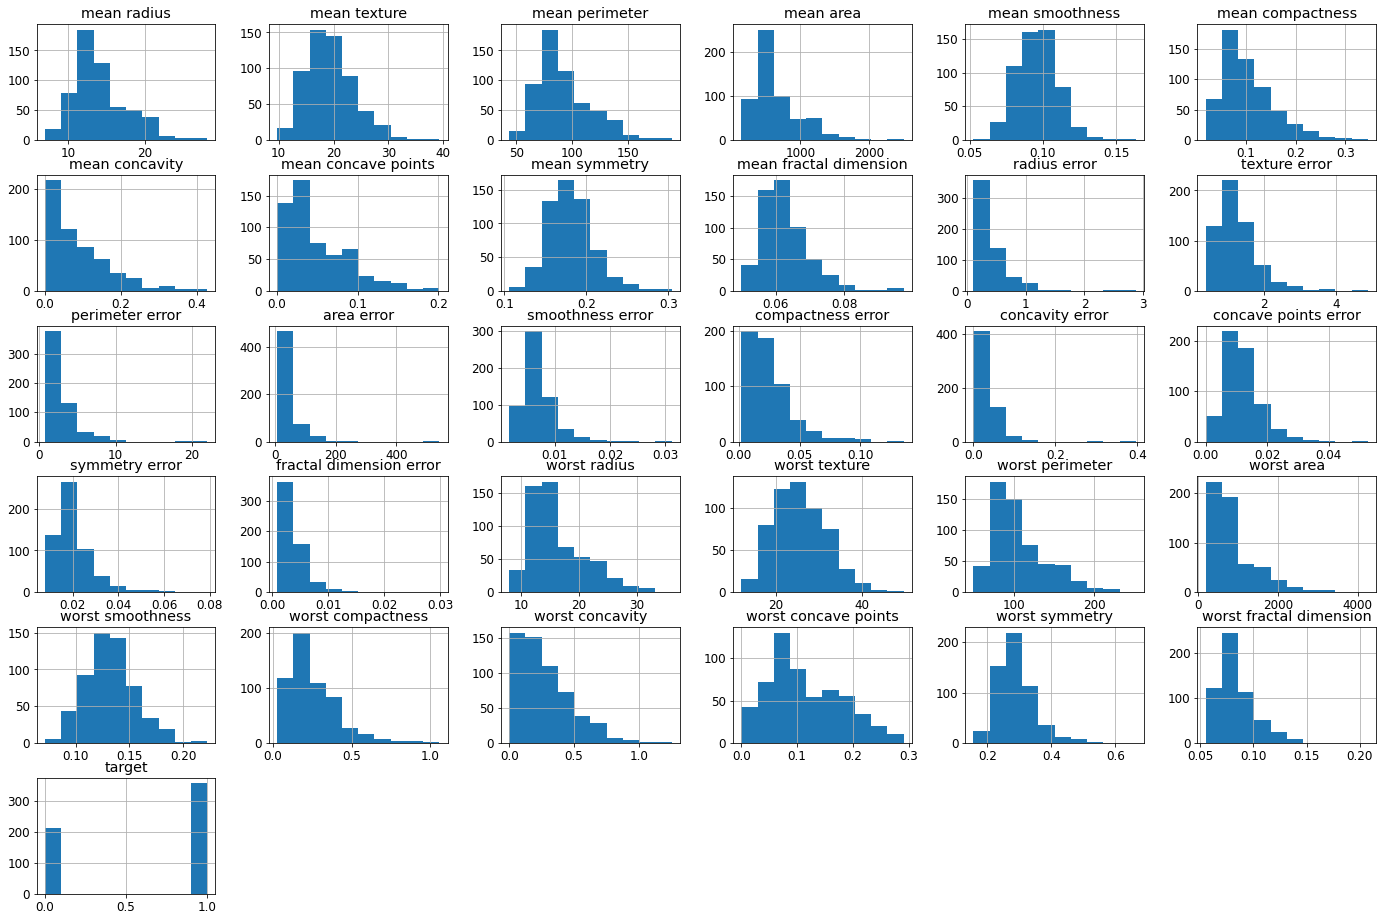

In [3]:
plt.rcParams.update({'font.size': 12})

df.hist(figsize=(24,16))
plt.savefig('visuals/raw_histograms.png',facecolor='white',bbox_inches="tight")

In [4]:
# define predictor and target variable names
X_var_names = df.columns[:df.shape[1]-1]
y_var_name = df.columns[df.shape[1]-1]

# create predictor and target arrays
X = df[X_var_names]
y = df[y_var_name]

#### Balance data using SMOTE

In [5]:
# # oversample minority class using smote
# X_resampled, y_resampled = SMOTE().fit_resample(X, y)

# # create train and test datasets using balanced
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [6]:
# y_resampled.hist(figsize=(6,4))
# plt.title('target (balanced)')
# plt.savefig('visuals/balanced_target_histogram.png',facecolor='white',bbox_inches="tight")

#### Train-test split

In [7]:
# create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
X_train.shape

(455, 30)

In [9]:
X_test.shape

(114, 30)

### Model Development

In [10]:
clf_list = []
model_name_list = ['DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier']

# train model
for model_name in model_name_list:

    # dynamically write command to train each classifier in model_name_list
    cmd = 'clf = ' + model_name + '(random_state=0)'
    print(cmd)    # print command
    exec(cmd)     # execute command
    
    # fit data to model
    clf = clf.fit(X_train, y_train)
    
    # append classifier to list
    clf_list.append(clf)

clf = DecisionTreeClassifier(random_state=0)
clf = RandomForestClassifier(random_state=0)
clf = AdaBoostClassifier(random_state=0)
clf = GradientBoostingClassifier(random_state=0)


In [11]:
clf_list

[DecisionTreeClassifier(random_state=0),
 RandomForestClassifier(random_state=0),
 AdaBoostClassifier(random_state=0),
 GradientBoostingClassifier(random_state=0)]

##### Evaluate performance

In [12]:
performance_dict = {}

dataset_name_list = ['train', 'test']
metric_name_list = ['precision', 'recall', 'f1']

for i in range(len(model_name_list)):
    
    clf = clf_list[i]
    
    prec_val_list = []
    col_name_list = []
    
    for dataset_name in dataset_name_list:

        cmd = 'y_pred_' + dataset_name + ' = clf.predict(X_' + dataset_name + ')'
        print(cmd)
        exec(cmd)
        
        for metric_name in metric_name_list:
        
            cmd = 'prec_val_list.append(' + metric_name + '_score(y_' + dataset_name + ', y_pred_' + dataset_name + '))'
            print(cmd)
            exec(cmd)


            col_name_list.append(metric_name + '_' + dataset_name)
        print('')

    performance_dict[model_name_list[i]] = prec_val_list
    
df_performance = np.round(pd.DataFrame.from_dict(performance_dict, orient='index', columns=col_name_list),3)

y_pred_train = clf.predict(X_train)
prec_val_list.append(precision_score(y_train, y_pred_train))
prec_val_list.append(recall_score(y_train, y_pred_train))
prec_val_list.append(f1_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
prec_val_list.append(precision_score(y_test, y_pred_test))
prec_val_list.append(recall_score(y_test, y_pred_test))
prec_val_list.append(f1_score(y_test, y_pred_test))

y_pred_train = clf.predict(X_train)
prec_val_list.append(precision_score(y_train, y_pred_train))
prec_val_list.append(recall_score(y_train, y_pred_train))
prec_val_list.append(f1_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
prec_val_list.append(precision_score(y_test, y_pred_test))
prec_val_list.append(recall_score(y_test, y_pred_test))
prec_val_list.append(f1_score(y_test, y_pred_test))

y_pred_train = clf.predict(X_train)
prec_val_list.append(precision_score(y_train, y_pred_train))
prec_val_list.append(recall_score(y_train, y_pred_train))
prec_val_list.append(

In [13]:
df_performance

,precision_train,recall_train,f1_train,precision_test,recall_test,f1_test
DecisionTreeClassifier,1.0,1.0,1.0,0.952,0.896,0.923
RandomForestClassifier,1.0,1.0,1.0,0.985,0.955,0.970
AdaBoostClassifier,1.0,1.0,1.0,0.956,0.970,0.963
GradientBoostingClassifier,1.0,1.0,1.0,0.970,0.970,0.970
